<a href="https://colab.research.google.com/github/Umgoel/AI_project/blob/main/AI_6_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
import numpy as np
i1 = cv2.imread('img1.jpg')
i2 = cv2.imread('img2.jpg')

# img1 = cv2.cvtColor(i1, cv2.COLOR_BGR2RGB)
# img2 = cv2.cvtColor(i2, cv2.COLOR_BGR2RGB)

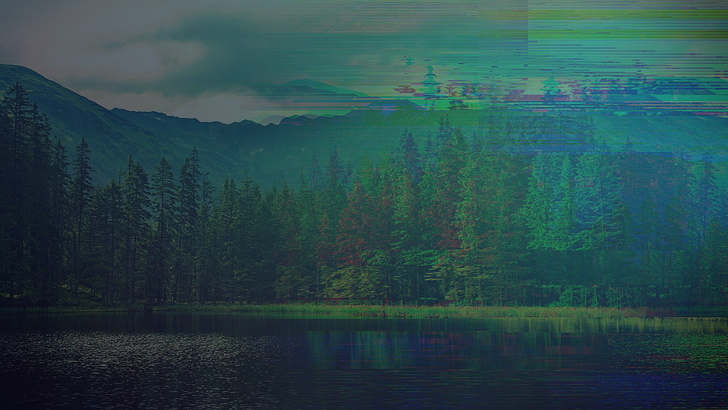

In [ ]:
op = cv2.subtract(i1,i2)
# cv2_imshow(op)
op = cv2.add(i1,i2)

# cv2_imshow(op)
#weightedADd
op = cv2.addWeighted(i1,0.3,i2,0.5,0)
# cv2_imshow(op)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


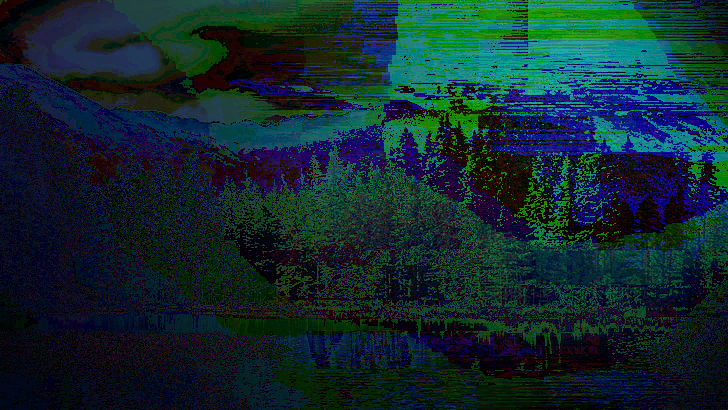

In [ ]:
op = cv2.bitwise_and(i1,i2,mask=None)
cv2_imshow(op)

In [50]:
i3 = cv2.imread('gray.jpg')


(1200, 1800, 3)

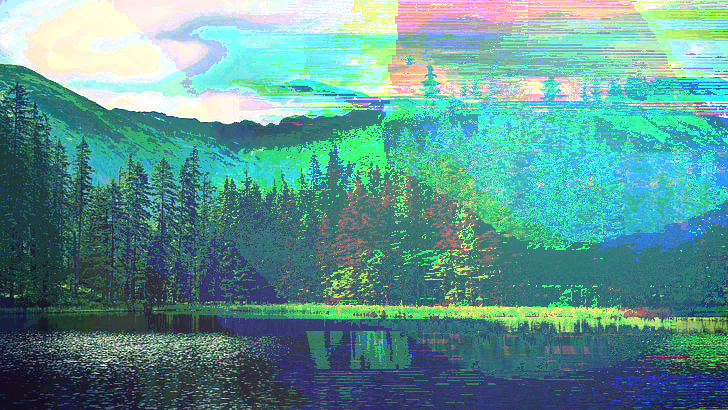

In [44]:
op = cv2.bitwise_or(i1,i2,mask=None)
cv2_imshow(op)

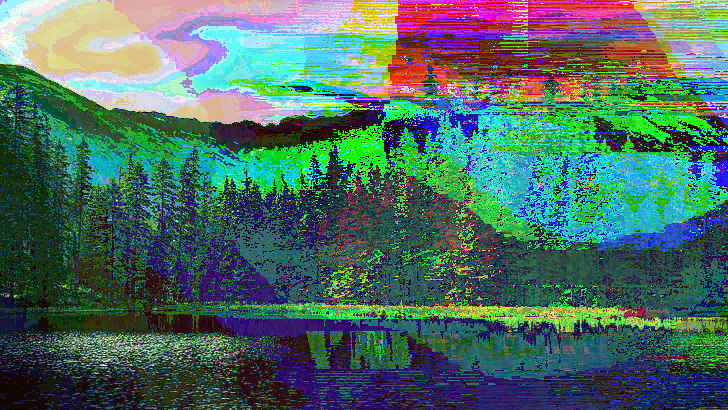

In [45]:
op = cv2.bitwise_xor(i1,i2,mask=None)
cv2_imshow(op)

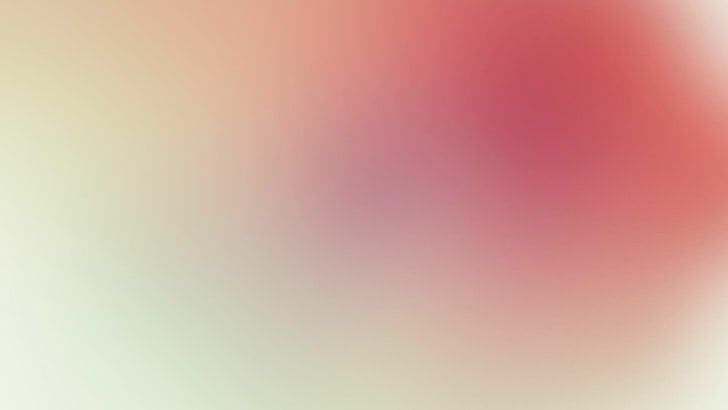

In [52]:
op = cv2.bitwise_not(i2)
cv2_imshow(op)

In [53]:
angle = 60 #angle for rotation
dx = 50 #pixels to move alogn x axis
dy = 75 #pixels to move along y axis
scale = 2.1 #scale for resizing the image

img = cv2.imread('bmsce.jfif')

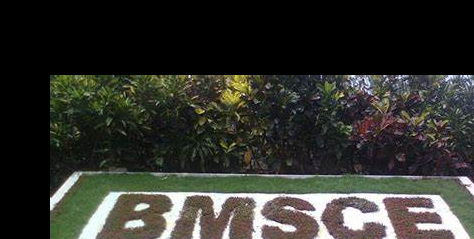

In [57]:
#transformation
translation_matrix = np.float32([[1, 0, dx], [0, 1, dy]])
trans_op = cv2.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0]))
cv2_imshow(trans_op)


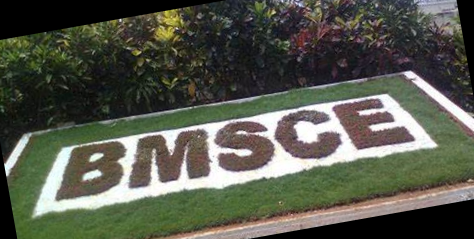

In [63]:
#rotation
rot_matrix = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 10, 1)
rot_op = cv2.warpAffine(img, rot_matrix, (img.shape[1], img.shape[0]))
cv2_imshow(rot_op)

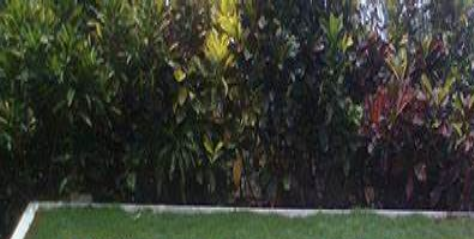

In [68]:
#scaling
scaling_matrix = np.float32([[1.2, 0, 0], [0, 2.1, 0]])
scaled_image = cv2.warpAffine(img, scaling_matrix, (img.shape[1], img.shape[0]))
cv2_imshow(scaled_image)

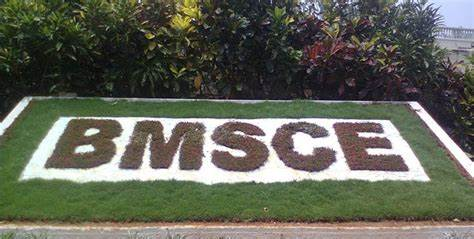

In [71]:
# Perspective transformation
src_points = np.float32([[0, 0], [img.shape[1] - 1, 0], [0, img.shape[0] - 1], [img.shape[1] - 1, img.shape[0] - 1]])
dst_points = np.float32([[0, 0], [img.shape[1] - 1, 0], [0, img.shape[0] - 1], [img.shape[1] - 1, img.shape[0] - 1]])

perspective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
perspective_img = cv2.warpPerspective(img, perspective_matrix, (img.shape[1], img.shape[0]))
cv2_imshow(perspective_img)

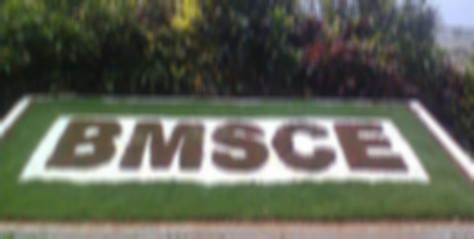

In [76]:
#blur
blur_op = cv2.GaussianBlur(img, (5, 11), cv2.BORDER_DEFAULT)
cv2_imshow(blur_op)

In [79]:
#deblur

# Convert the image to grayscale
blurred_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel_size = (3, 3)
sigma = 1.0
kernel = cv2.getGaussianKernel(kernel_size[0], sigma)
blurring_kernel = np.outer(kernel, kernel.transpose())

# Perform inverse filtering
deblurred_image = cv2.filter2D(blurred_gray, -1, np.linalg.inv(blurring_kernel))

# Display the blurred and deblurred images
cv2.imshow(deblurred_image)

LinAlgError: ignored

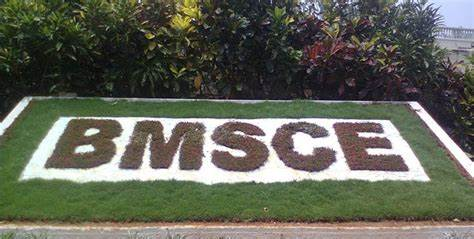

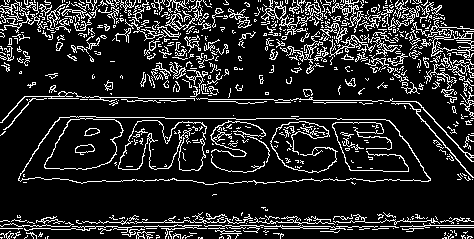

In [82]:
#edge detetction canny method

image = cv2.imread('bmsce.jfif')

# Apply Canny edge detection
min_threshold = 100
max_threshold = 200
edges = cv2.Canny(image, min_threshold, max_threshold)

# Display the original image and edges
cv2_imshow(image)
cv2_imshow(edges)